In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, geom_line, facet_wrap, theme_minimal, labs

In [7]:
df = pd.read_csv('../src/metrics_results.csv')

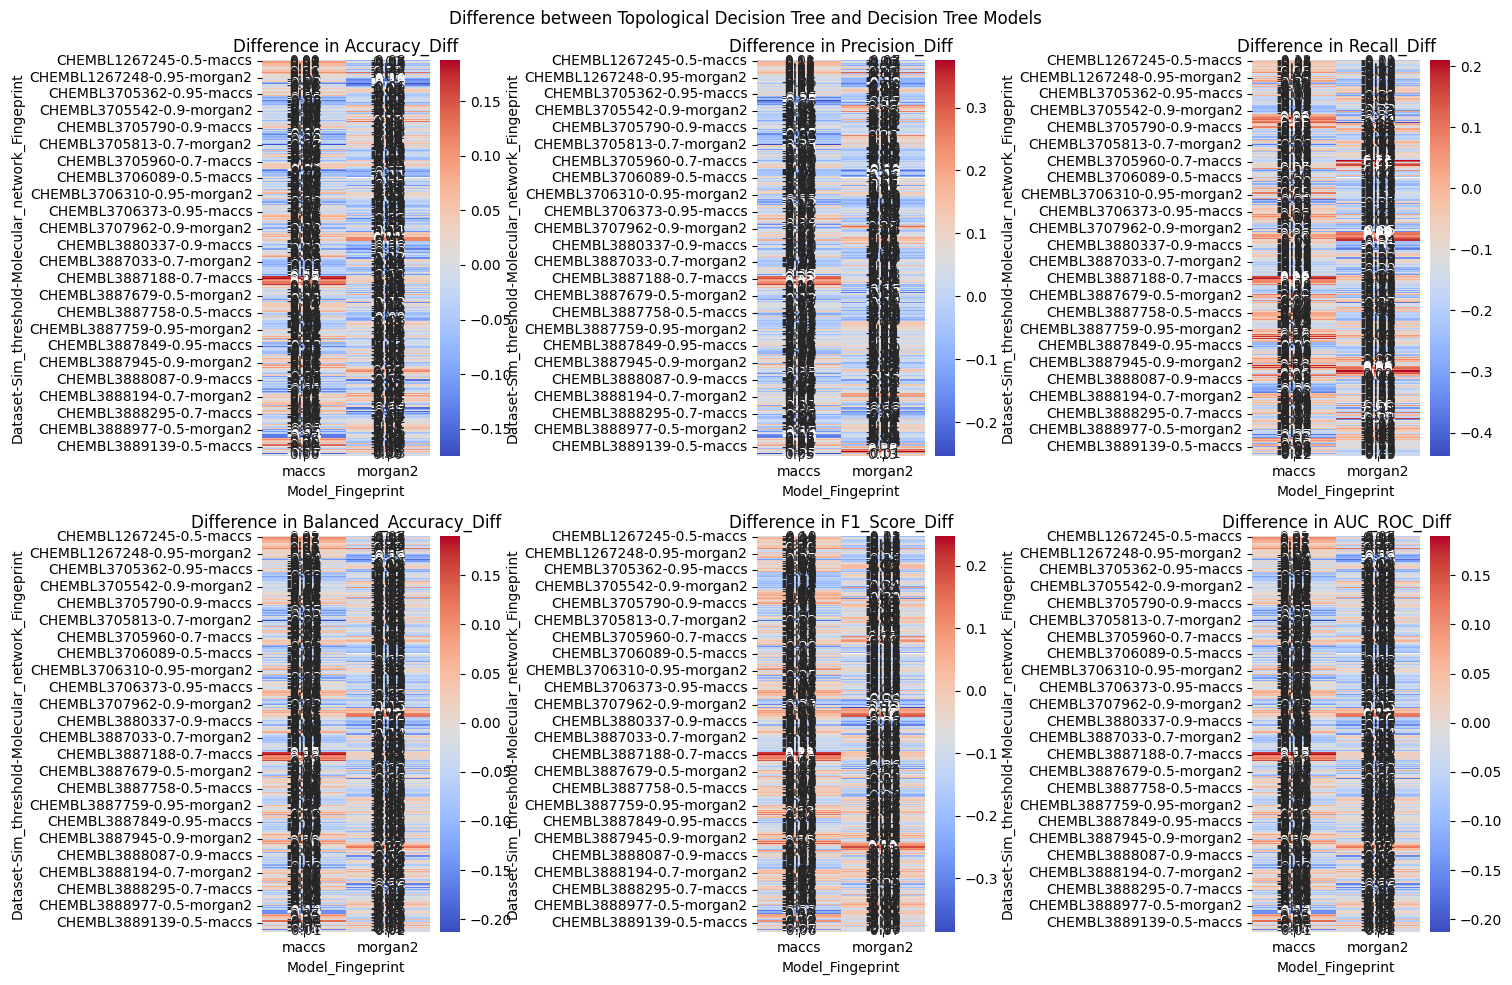

In [8]:
# Calculate the differences between Topological Decision Tree and Decision Tree models
df['Accuracy_Diff'] = df['Topological_Decision_Tree_Accuracy'] - df['Decision_Tree_Accuracy']
df['Precision_Diff'] = df['Topological_Decision_Tree_Precision'] - df['Decision_Tree_Precision']
df['Recall_Diff'] = df['Topological_Decision_Tree_Recall'] - df['Decision_Tree_Recall']
df['Balanced_Accuracy_Diff'] = df['Topological_Decision_Tree_Balanced_Accuracy'] - df['Decision_Tree_Balanced_Accuracy']
df['F1_Score_Diff'] = df['Topological_Decision_Tree_F1_Score'] - df['Decision_Tree_F1_Score']
df['AUC_ROC_Diff'] = df['Topological_Decision_Tree_AUC_ROC'] - df['Decision_Tree_AUC_ROC']

# Prepare data for heatmap
df_heatmap = df.pivot_table(index=['Dataset', 'Sim_threshold', 'Molecular_network_Fingeprint', 'Model_Fingeprint'],
                            values=['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 'Balanced_Accuracy_Diff',
                                    'F1_Score_Diff', 'AUC_ROC_Diff'], aggfunc='mean')

# Plotting the heatmaps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

metrics = ['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 
           'Balanced_Accuracy_Diff', 'F1_Score_Diff', 'AUC_ROC_Diff']

for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]
    sns.heatmap(df_heatmap[metric].unstack(), ax=ax, cmap='coolwarm', annot=False, fmt='.2f')
    ax.set_title(f'Difference in {metric}')

plt.suptitle('Difference between Topological Decision Tree and Decision Tree Models')
plt.tight_layout()
plt.show()